Data Loading & Cleaning

In [ ]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use("seaborn")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# Load the dataset
#drive.mount('/content/gdrive')
#orginaldf = pd.read_csv('/content/gdrive/My Drive/Used_Bikes Dataset.csv')
#orginaldf.head()

# Load the dataset
url='https://raw.githubusercontent.com/suresh687/AIDI1003_UsedBike_CapstoneProject1/main/Used_Bikes.csv'
orginaldf = pd.read_csv(url)
orginaldf.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [ ]:
#copy of loaded dataframe
df=orginaldf.copy()
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [ ]:
# basic info about data loaded into dataframe (Feature Name, non null counts, data type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [ ]:
#size of dataset
print("size of the dataset",df.shape)
#unique value count
print("unique count in the data of all features\n",df.nunique())
#null vale check count
print("null/missing value counts for each column\n",df.isnull().sum())

size of the dataset (32648, 8)
unique count in the data of all features
 bike_name      471
price         1232
city           443
kms_driven    3722
owner            4
age             35
power           53
brand           23
dtype: int64
null/missing value counts for each column
 bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64


In [ ]:
#As we have 4 categorical features , we are creating new 4 features representing this categorical features into numerical
df['bike_name_OrdinalNo']=df['bike_name']
df['city_OrdinalNo']=df['city']
df['owner_OrdinalNo']=df['owner']
df['brand_OrdinalNo']=df['brand']

In [ ]:
#Using OrdinalEncoder transform features into numerical values
encoder = OrdinalEncoder()
df['bike_name_OrdinalNo'] = encoder.fit_transform(df['bike_name_OrdinalNo'].to_numpy().reshape(-1,1))
df['city_OrdinalNo'] = encoder.fit_transform(df['city_OrdinalNo'].to_numpy().reshape(-1,1))
df['owner_OrdinalNo'] = encoder.fit_transform(df['owner_OrdinalNo'].to_numpy().reshape(-1,1))
df['brand_OrdinalNo'] = encoder.fit_transform(df['brand_OrdinalNo'].to_numpy().reshape(-1,1))
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,bike_name_OrdinalNo,city_OrdinalNo,owner_OrdinalNo,brand_OrdinalNo
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,401.0,6.0,0.0,19.0
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,295.0,118.0,0.0,17.0
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph,411.0,118.0,0.0,20.0
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS,375.0,44.0,0.0,19.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,426.0,44.0,0.0,21.0


In [ ]:
#Printing  no. of unique values in Categorical Features with different combination
print("Unique values in Bike Name Ordinal Feature: ",df['bike_name_OrdinalNo'].unique().size)
print("Unique values in City Ordinal Feature: ",df['city_OrdinalNo'].unique().size)
print("Unique values in Brand Feature: ",df['brand'].unique().size)
print("Unique values in Brand Ordinal Feature: ",df['brand_OrdinalNo'].unique().size)
print("Unique values in Owner Feature: ",df['owner'].unique().size)
print("Unique values in Bike Name+Owner+City Feature: ",((df['bike_name']+df['owner']+df['city']).value_counts()).unique)
print("Unique values in Bike Name+Owner Feature: ",((df['bike_name']+df['owner']).value_counts()).unique)
print(df['brand_OrdinalNo'])

Unique values in Bike Name Ordinal Feature:  471
Unique values in City Ordinal Feature:  443
Unique values in Brand Feature:  23
Unique values in Brand Ordinal Feature:  23
Unique values in Owner Feature:  4
Unique values in Bike Name+Owner+City Feature:  <bound method Series.unique of Hero Passion Pro 100ccFirst OwnerDelhi                     1271
Bajaj Avenger 220ccFirst OwnerBangalore                    1261
Royal Enfield Classic 350ccFirst OwnerDelhi                 746
Bajaj Pulsar 150ccFirst OwnerDelhi                          657
Royal Enfield Bullet Electra 350ccFirst OwnerDelhi          655
                                                           ... 
Honda Dream Neo 110ccFirst OwnerRohtak                        1
Yamaha FZS FI 150cc Special EditionFirst OwnerBangalore       1
Honda CBR 250R ABSFirst OwnerNoida                            1
Hero Passion XPRO 110 ccFirst OwnerJaipur                     1
Bajaj Pulsar RS200 ABSFirst OwnerNamakkal                     1
Length: 3

In [ ]:
# Creating a dataframe by dropping the categorical features
df_without_categorical=df.drop(['bike_name','owner','city','brand'],axis=1)
df_without_categorical.head()

,price,kms_driven,age,power,bike_name_OrdinalNo,city_OrdinalNo,owner_OrdinalNo,brand_OrdinalNo
0,35000.0,17654.0,3.0,110.0,401.0,6.0,0.0,19.0
1,119900.0,11000.0,4.0,350.0,295.0,118.0,0.0,17.0
2,600000.0,110.0,8.0,675.0,411.0,118.0,0.0,20.0
3,65000.0,16329.0,4.0,180.0,375.0,44.0,0.0,19.0
4,80000.0,10000.0,3.0,150.0,426.0,44.0,0.0,21.0


Feature Scaling

In [ ]:
# Scaling all features except Price 
scaler = MinMaxScaler()
names = df_without_categorical.columns
d = scaler.fit_transform(df_without_categorical.drop(['price'],axis=1))
scaled_df = pd.DataFrame(d, columns=names[1:])
scaled_df['price']=df_without_categorical['price']
scaled_df.head()


,kms_driven,age,power,bike_name_OrdinalNo,city_OrdinalNo,owner_OrdinalNo,brand_OrdinalNo,price
0,0.023537,0.032258,0.005882,0.853191,0.013575,0.0,0.863636,35000.0
1,0.014665,0.048387,0.147059,0.627660,0.266968,0.0,0.772727,119900.0
2,0.000145,0.112903,0.338235,0.874468,0.266968,0.0,0.909091,600000.0
3,0.021771,0.048387,0.047059,0.797872,0.099548,0.0,0.863636,65000.0
4,0.013332,0.032258,0.029412,0.906383,0.099548,0.0,0.954545,80000.0


<Figure size 1080x1080 with 0 Axes>

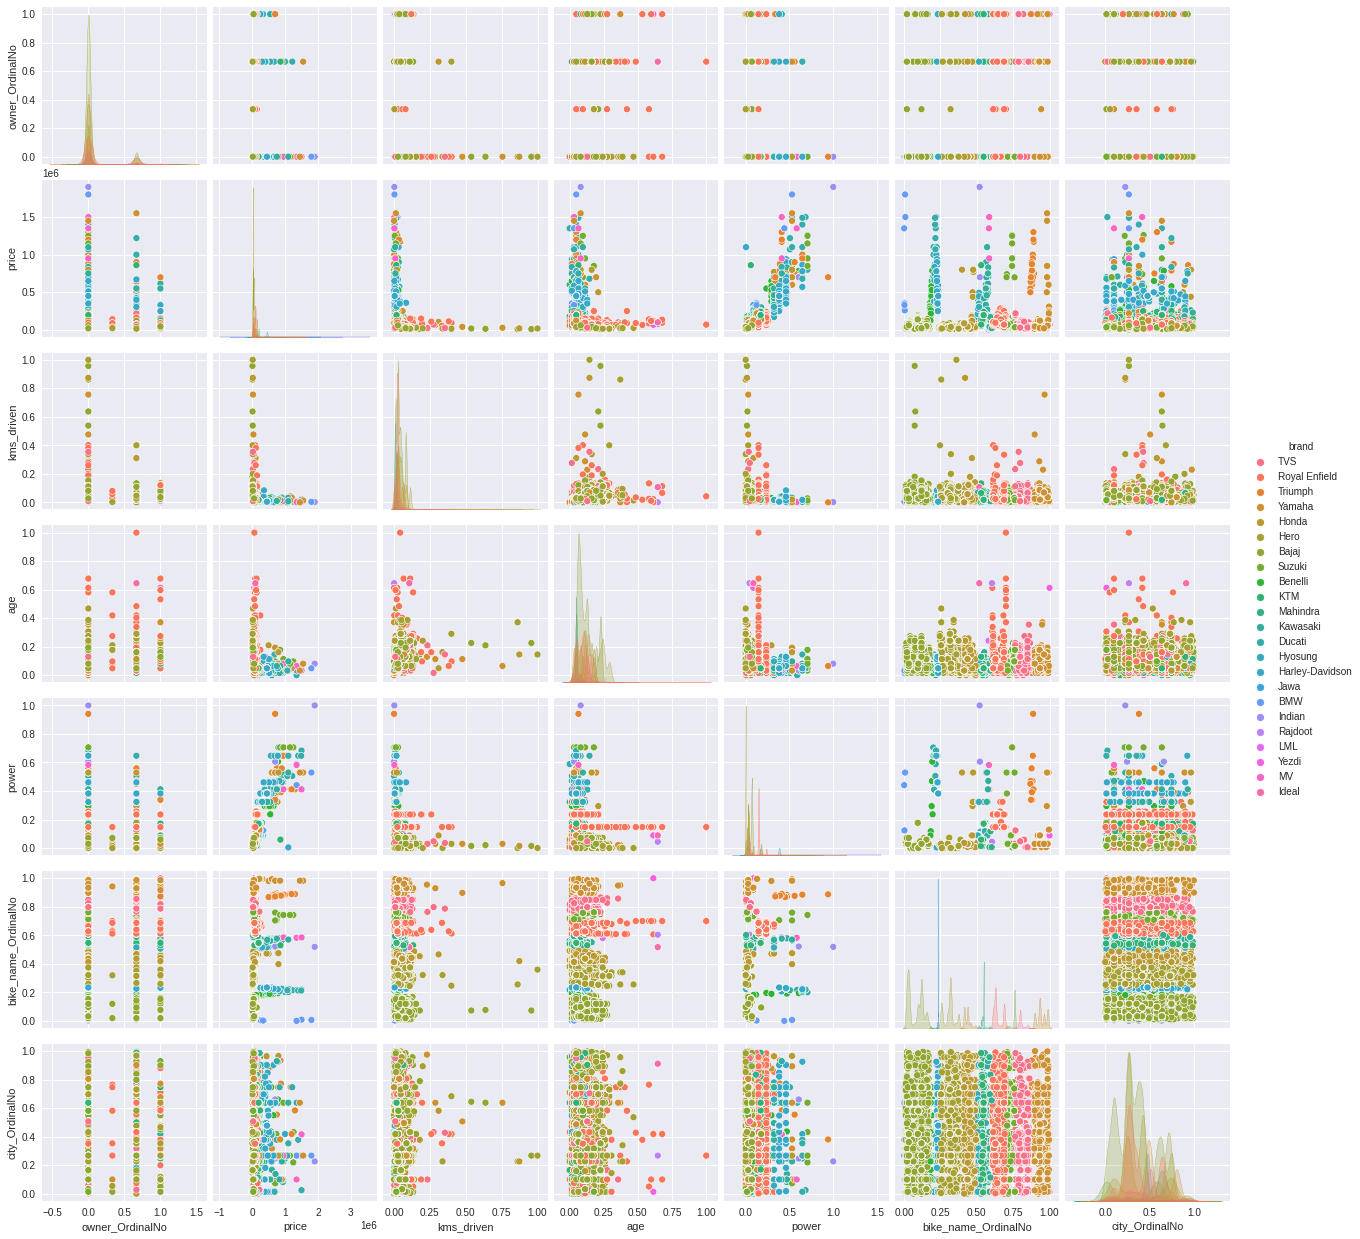

In [ ]:
#Plotting the pair plots for all features to view correlation
scaled_df['brand']=df['brand']
cols_to_plot = ['brand','owner_OrdinalNo', 'price', 'kms_driven', 'age', 'power','bike_name_OrdinalNo','city_OrdinalNo']
plt.figure(figsize=(15,15))
sns.pairplot(scaled_df[cols_to_plot], hue='brand')
plt.show()

In [ ]:
#Constructing the correlation matrix
correlationmatrix = df_without_categorical.corr()
round(correlationmatrix,2)

,price,kms_driven,age,power,bike_name_OrdinalNo,city_OrdinalNo,owner_OrdinalNo,brand_OrdinalNo
price,1.00,-0.31,-0.40,0.86,0.06,0.09,-0.04,0.07
kms_driven,-0.31,1.00,0.48,-0.26,-0.06,-0.11,-0.02,-0.10
age,-0.40,0.48,1.00,-0.34,-0.05,0.04,0.30,-0.08
power,0.86,-0.26,-0.34,1.00,0.05,0.05,0.04,0.13
bike_name_OrdinalNo,0.06,-0.06,-0.05,0.05,1.00,0.12,-0.02,0.97
city_OrdinalNo,0.09,-0.11,0.04,0.05,0.12,1.00,0.14,0.09
owner_OrdinalNo,-0.04,-0.02,0.30,0.04,-0.02,0.14,1.00,-0.00
brand_OrdinalNo,0.07,-0.10,-0.08,0.13,0.97,0.09,-0.00,1.00


We see there is high correlation between (power,price) followed by (Age and Price) then followed by (kms_driven,price) and all other features paired with price have less correlation i.e. <10% 

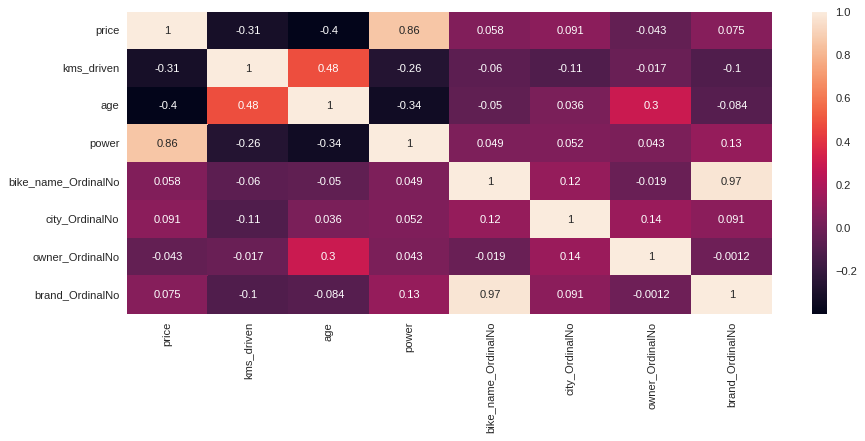

In [ ]:
#Plotting heatmap for the same correlation matrix 
plt.figure(figsize = (13,5),dpi = 80)
sns.heatmap(correlationmatrix,annot=True);

In [ ]:
#x ,y = df.drop(['price','city','bike_name'],axis=1),df['price']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Splitting the data into training and test data



In [ ]:
# Splitting the data into Training and test data into 75% and 25 % respectively without categorical features as they didn't have much correlation
x_num ,y_num = scaled_df.drop(['price','brand','brand_OrdinalNo','city_OrdinalNo','owner_OrdinalNo','bike_name_OrdinalNo'],axis=1),scaled_df['price']
x_train_num, x_test_num, y_train_num, y_test_num = train_test_split(x_num, y_num, test_size=0.25,random_state=42)
x_test_num

,kms_driven,age,power
28994,0.030431,0.112903,0.000000
31433,0.057115,0.112903,0.029412
17250,0.086605,0.225806,0.029412
13738,0.047999,0.225806,0.029412
24577,0.021780,0.096774,0.147059
...,...,...,...
10877,0.046623,0.209677,0.029412
32314,0.064781,0.112903,0.029412
17122,0.027163,0.080645,0.070588
28334,0.009501,0.064516,0.070588


Model Fitting & Prediction

AlgoName:  LinearRegression()  R2 Score 0.7325112161615859


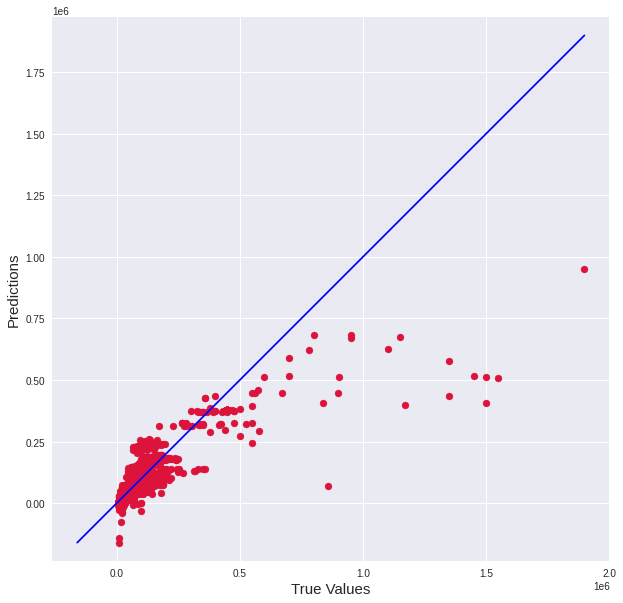

AlgoName:  SVR()  R2 Score -0.03669056699431916


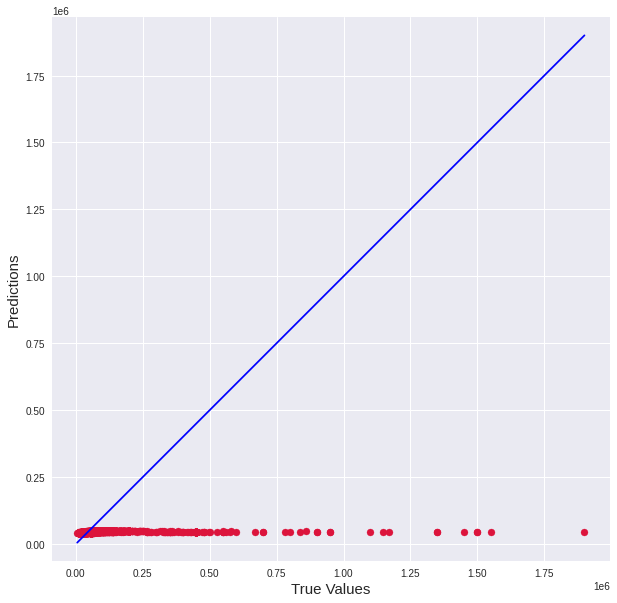

AlgoName:  DecisionTreeRegressor(max_depth=20, random_state=42)  R2 Score 0.9187382260525662


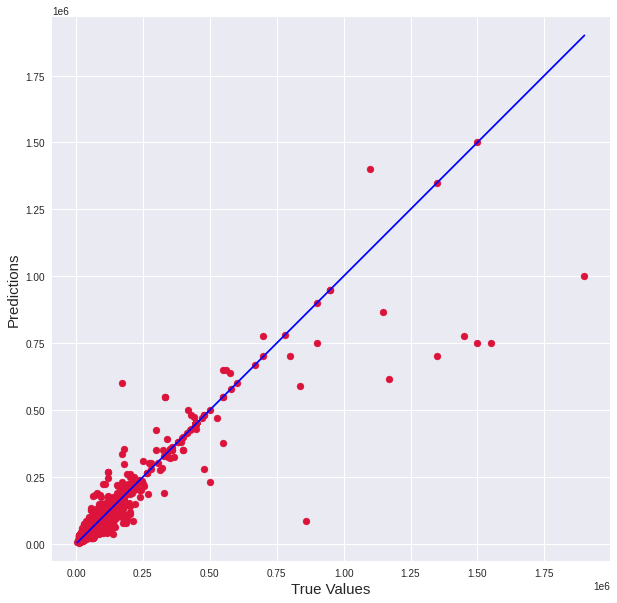

AlgoName:  RandomForestRegressor(max_depth=20, random_state=42)  R2 Score 0.9364590940461766


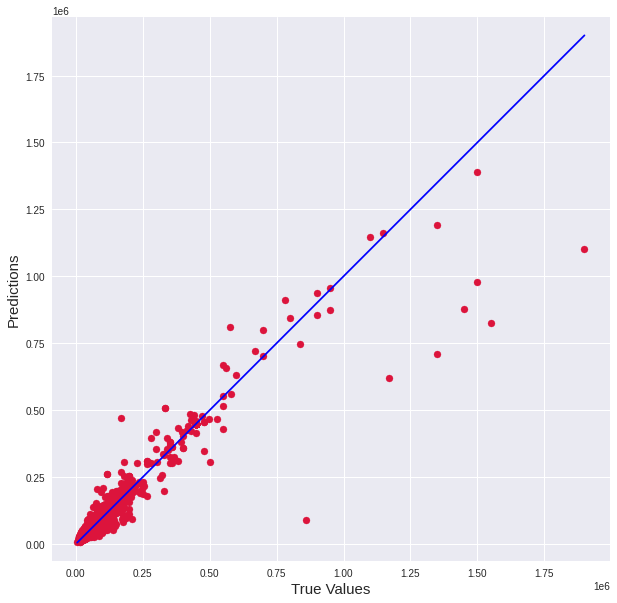

In [ ]:
# Training & Fitting the model, Linear Regression,Random Forest,Decision Tree & SVR on the Training set without categorical features as they didn't have much correlation
for algoName in [LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(max_depth=20, random_state=42),RandomForestRegressor(max_depth=20, random_state=42)]:
  classifier = algoName
  classifier.fit(x_train_num, y_train_num)
  y_pred_num = classifier.predict(x_test_num)
  print('AlgoName: ',algoName,' R2 Score',r2_score(y_test_num, y_pred_num))
  plt.figure(figsize=(10,10))
  plt.scatter(y_test_num, y_pred_num, c='crimson')
  #plt.yscale('log')
  #plt.xscale('log')
  p1 = max(max(y_pred_num), max(y_test_num))
  p2 = min(min(y_pred_num), min(y_test_num))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()

In [ ]:
# Splitting the data into into Training and test data into 75% and 25 % respectively with all features except brand
x ,y = scaled_df.drop(['price','brand'],axis=1),scaled_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

AlgoName:  LinearRegression()  R2 Score 0.7937823216174693


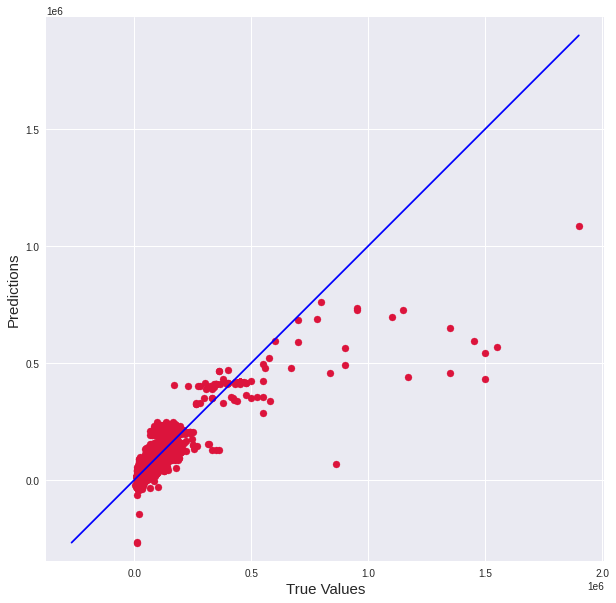

AlgoName:  SVR()  R2 Score -0.065554327636689


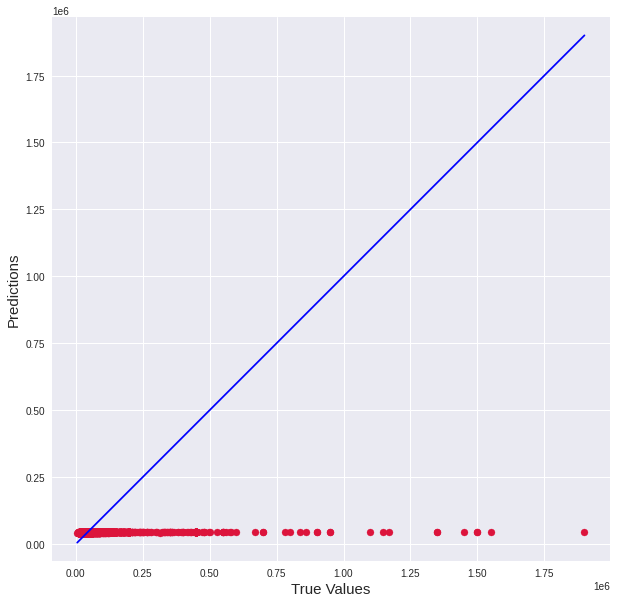

AlgoName:  DecisionTreeRegressor(max_depth=20, random_state=42)  R2 Score 0.9441366441603711


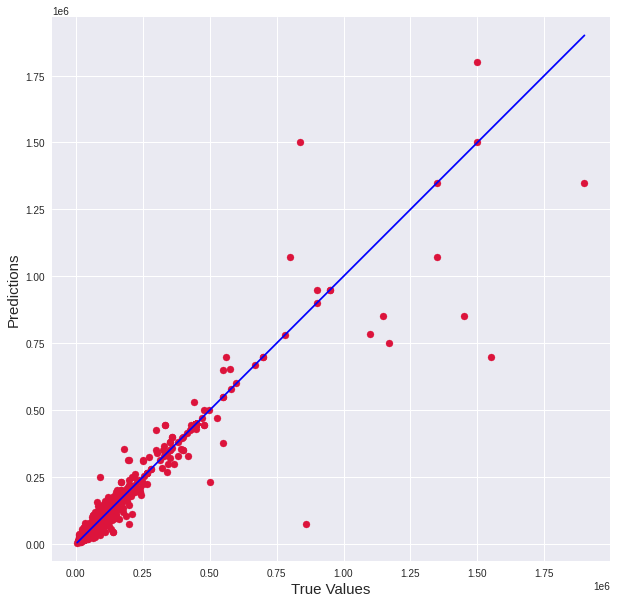

AlgoName:  RandomForestRegressor(max_depth=20, random_state=42)  R2 Score 0.9528166749423131


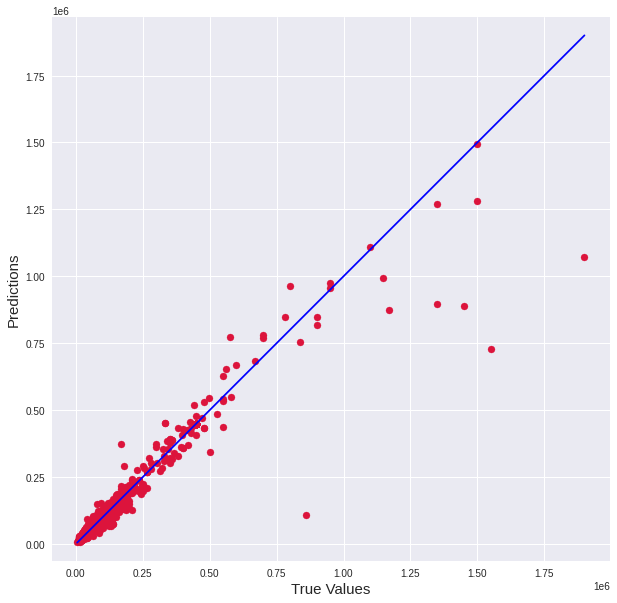

In [ ]:
# Training & Fitting the model, Linear Regression,Random Forest,Decision Tree & SVR on the Training set considering all features except brand
for algoName in [LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(max_depth=20, random_state=42),RandomForestRegressor(max_depth=20, random_state=42)]:
  classifier = algoName
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print('AlgoName: ',algoName,' R2 Score',r2_score(y_test, y_pred))
  plt.figure(figsize=(10,10))
  plt.scatter(y_test, y_pred, c='crimson')
  #plt.yscale('log')
  #plt.xscale('log')
  p1 = max(max(y_pred), max(y_test))
  p2 = min(min(y_pred), min(y_test))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()